### MAP556, Ecole Polytechnique, 2022-23

# TP 6 - Gaussian Mixture Models 

There are Coding Questions (CQ) and Theoretical Questions (TQ).
Import first the following librairies.

In [38]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
plt.rcParams["axes.grid"] = False

## Estimation of a GMM model and generation of samples

We consider the following mixture of Gaussians model:
$$
Z \sim \text{Cat}(\varpi_1,\ldots, \varpi_K)
$$
with
$$
X \mid Z = k \sim \mathcal{N}(\mathbf{m}_k, \Sigma_k)
$$
where $\{\varpi_k\}_{k=1,\dots,K}$ are convex weights, $\sum_{k=1}^K \varpi_k= 1$, and $\{\mathbf{m}_k,\Sigma_k\}_{k=1,\dots,K}$ are sequences of means and covariance matrices. 

$\blacktriangleright$ CQ1a. Fix the parameters of the mixture of Gaussians model.

- The weights $\varpi_k$ are given.
- The means $\mathbf{m}_k$ are given.
- The covariances matrix $\Sigma_k$ (semidefinite positive) are randomly given by the Scikit-learn function 'make_spd_matrix'. Use the parameter 'random_state=1' instead of 'random_state=None' to ensure reproducibility of the data.

$\blacktriangleright$ CQ1b. Generate some samples in 2D from this models completing the code below.

- The number $N$ of sampled data is $100$.
- Draw the cluster with respect to the weights.
- Draw a sample from the selected cluster Gaussian law.

In [69]:
## Define the parameters.
# Define the mean points for each of the synthetic cluster centers.
t_means = [[8.4, 8.2], [1.4, 1.6], [2.4, 5.4], [6.4, 2.4]]

# Define the weights for each of the clusters.
t_weights = [0.1, 0.2, 0.15, 0.25]
t_weights = t_weights/np.sum(t_weights)

# For each cluster center, create a positive semidefinite covariance matrix.
# Use make_spd_matrix from Scikit-learn module.
t_covs = []
for s in range(len(t_means)):
    t_covs.append(make_spd_matrix(2,random_state=1))
t_covs = np.array(t_covs)

print("covariance matrices: \n ", t_covs)
    
## Generate some data from the model.
# Define the number of samples to be drawn.
N = 2000

# Draw with respect to the model.
X = []
for i in range(N):
  # randomly select a cluster center
  s = np.random.choice(len(t_means), p=t_weights)
  # draw a sample from the selected cluster center
  X.append(np.random.multivariate_normal(t_means[s], t_covs[s]))

X = np.array(X)
np.random.shuffle(X)
print("Dataset shape:", X.shape)

covariance matrices: 
  [[[1.91269041 0.60964271]
  [0.60964271 0.32640408]]

 [[1.91269041 0.60964271]
  [0.60964271 0.32640408]]

 [[1.91269041 0.60964271]
  [0.60964271 0.32640408]]

 [[1.91269041 0.60964271]
  [0.60964271 0.32640408]]]
Dataset shape: (2000, 2)


The code below will be used to plot the data and the cluster centers.

In [70]:
# Create a grid for visualization purposes 
x = np.linspace(np.min(X[...,0])-1, np.max(X[...,0])+1, 100)
y = np.linspace(np.min(X[...,1])-1, np.max(X[...,1])+1, 80)

X_,Y_ = np.meshgrid(x,y)
pos = np.array([X_.flatten(),Y_.flatten()]).T

print("pos.shape", pos.shape)
print(np.max(pos[...,1]))

pos.shape (8000, 2)
10.594358593010504


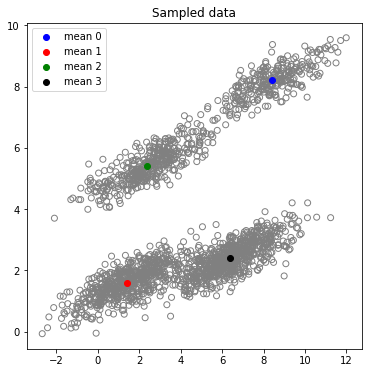

In [71]:
# Draw the sampled data
plt.figure(figsize=(6,int(6)))
plt.title("Sampled data")
axes = plt.gca()
colors = ['blue', 'red', 'green', 'black', 'cyan', 'magenta', 'yellow', 'brown']

plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
for j in range(4):
    plt.scatter(t_means[j][0], t_means[j][1], color=colors[j], label="mean {}".format(j))
plt.legend(loc="best")

$\blacktriangleright$ TQ1. The likelihood for one observation is 
$$
L(\theta; x_i) = p_\theta(x_i) = \sum_{k=1}^K \varpi_k \phi(x_i | \mathbf{m}_k, \Sigma_k),
$$
and the complete log-likelihood of the model is
$$
\log L(\theta;x,z) = \log\left(\prod_{i=1}^N \sum_{k=1}^K \varpi_k \phi(x_i | \mathbf{m}_k, \Sigma_k) \right)
\\
= \sum_{i=1}^N \log\left( \sum_{k=1}^K \varpi_k \phi(x_i | \mathbf{m}_k, \Sigma_k) \right).
$$

$\blacktriangleright$ TQ2. Recall the principle of the EM algorithm.

- The EM algorithm is a fixed point algorithm, or a minimization-maximization algorithm with two repeated elementary steps, to estimate parameters $\theta$.
- At step $n$ of the algorithm, we have two elementary steps:
 - Given an estimate $\theta^{(n)}$ of the parameters, the E-step defines a function $\psi^{(n)}$ of $\theta$ seen as an expected value of a log-likelihood. This is the "Estimation" or "Expectation" step. 
 - The M-step compute the optimal parameters $\theta^{(n+1)}$ as maximizers of this function $\psi^{(n)}$. This is the "Maximization" step.

$\blacktriangleright$ TQ3. Give the explicit step E and M of the EM algorithm.

- In the E-step, we have to compute
$$
\psi^{(n)}(\theta) =\sum_{i=1}^N \sum_{\tilde z=1}^K p_{\theta^{(n)}}(\tilde z|x_i) \log \frac{p_{\theta}(x_i,\tilde z)}{p_{\theta^{(n)}}(\tilde z|x_i)}
$$

- In the M-step, we have to maximize $\psi^{(n)}$ over $\theta$. 
Thanks to the form of the function $\psi^{(n)}$, the resulting expressions for the new parameters are

$$
\varpi^{(n+1)}_k = \frac{1}{N} \sum_{i=1}^N \frac{\varpi_k^{(n)} \phi(x_i | \mathbf{m}_k^{(n)}, \Sigma_k^{(n)})}{\mathcal{Z}_i},
$$

$$
\mathbf{m}^{(n+1)}_k = \frac{1}{N\varpi^{(n+1)}_k} \sum_{i=1}^N
\frac{\varpi_k^{(n)} \phi(x_i | \mathbf{m}_k^{(n)}, \Sigma_k^{(n)}) x_i}{\mathcal{Z}_i},
$$
and
$$
\Sigma^{(n+1)}_k = \frac{1}{N\varpi^{(n+1)}_k}\sum_{i=1}^N
\frac{
\varpi_k^{(n)} \phi(x_i | \mathbf{m}_k^{(n)}, \Sigma_k^{(n)})
(x_i-\mathbf{m}^{(n+1)}_k)(x_i-\mathbf{m}^{(n+1)}_k)^T
}{\mathcal{Z}_i},
$$
where $$
\mathcal{Z}_i = \sum_{j=1}^K \varpi_j^{(n)} \phi(x_i | \mathbf{m}_j^{(n)}, \Sigma_j^{(n)}).
$$

In the sequel, we implement the EM algorithm to fit the generated data.

$\blacktriangleright$ CQ2a. Initialize the weight and mean vectors.

In [77]:
# Define the number of clusters to be learned
k = 4

# Create and initialize the cluster centers and the weight parameters
weights = np.ones((k)) / k # poids uniformes

means = np.random.choice(a = X.flatten(), size=(k, X.shape[1]))

print("initial means: \n", means)
print("initial weights: \n", weights)

initial means: 
 [[0.57091651 1.44987748]
 [5.88025107 7.46701555]
 [1.26075212 1.82354012]
 [1.61863956 3.85200635]]
initial weights: 
 [0.25 0.25 0.25 0.25]


$\blacktriangleright$ CQ2b. Initialize the list of covariance matrices using make_spd_matrix.

In [78]:
# Create and initialize a positive semidefinite covariance matrix 
cov = []
for i in range(k):
    cov.append(make_spd_matrix(X.shape[1], random_state=1))
cov = np.array(cov)
print("cov.shape: ", cov.shape)
print("initial covariance matrices: \n ", cov)

cov.shape:  (4, 2, 2)
initial covariance matrices: 
  [[[1.91269041 0.60964271]
  [0.60964271 0.32640408]]

 [[1.91269041 0.60964271]
  [0.60964271 0.32640408]]

 [[1.91269041 0.60964271]
  [0.60964271 0.32640408]]

 [[1.91269041 0.60964271]
  [0.60964271 0.32640408]]]


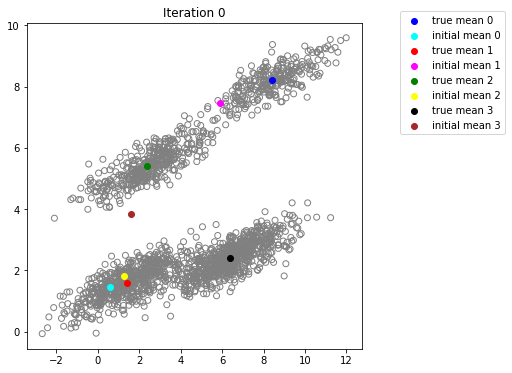

In [79]:
# Visualize the initial clusters among sampled data
plt.figure(figsize=(6,int(6)))
plt.title("Iteration {}".format(0))
axes = plt.gca()

plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
for j in range(4):
    plt.scatter(t_means[j][0], t_means[j][1], color=colors[j], label="true mean {}".format(j))
    plt.scatter(means[j][0], means[j][1], color=colors[j+4], label="initial mean {}".format(j))

plt.legend(bbox_to_anchor=(1.1, 1.05))

$\blacktriangleright$ CQ3. Implement the EM algorithm to fit the generated data.

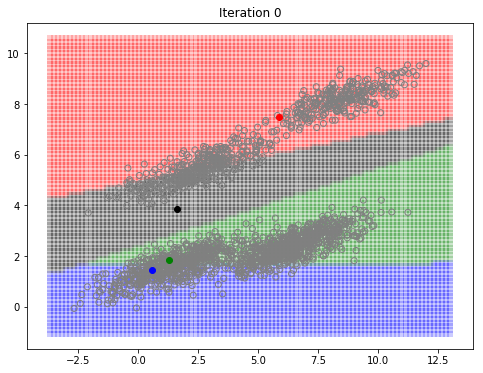

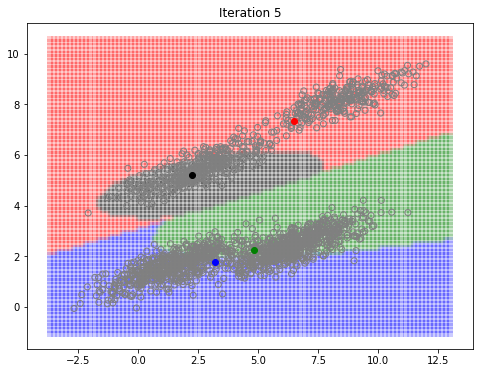

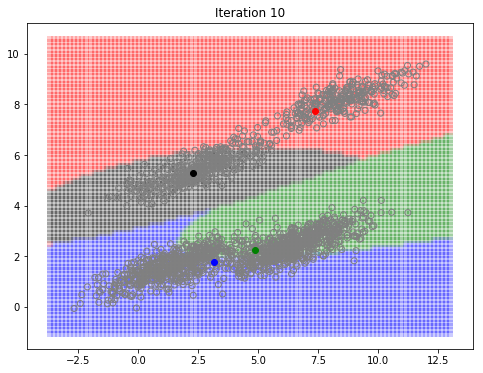

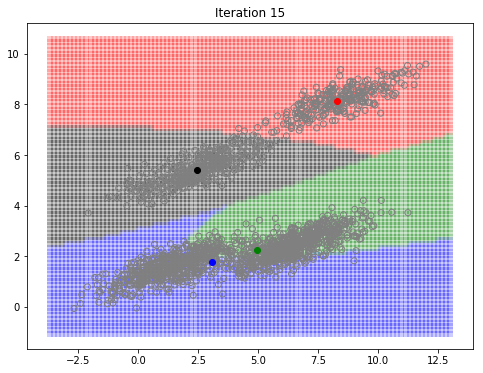

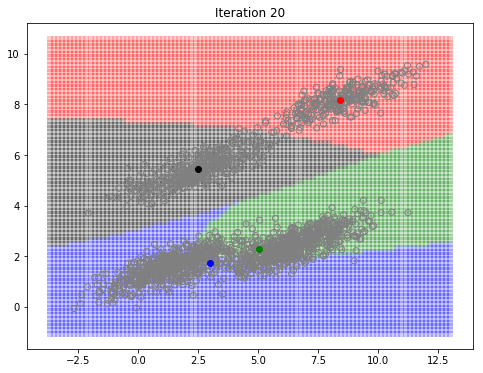

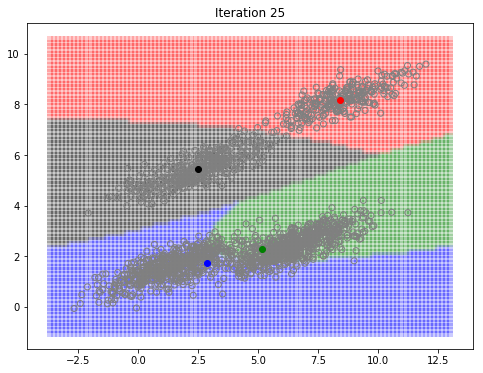

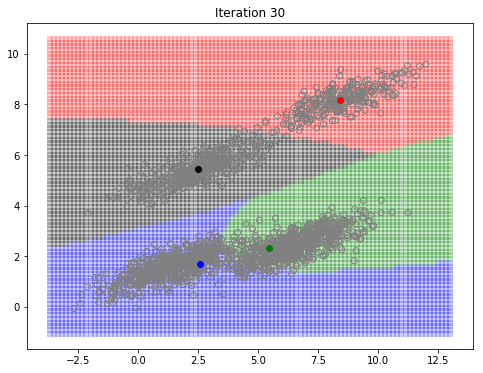

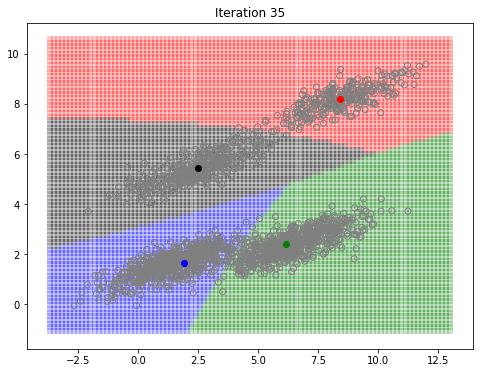

In [80]:
eps=1e-8

# Run GMM for 40 steps
for step in range(40):
    # Visualize the learned clusters
    if step % 5 == 0:
        plt.figure(figsize=(8,int(6)))
        plt.title("Iteration {}".format(step))
        axes = plt.gca()
        
        likelihood = []
        for j in range(k):
            likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j], allow_singular=True))
        likelihood = np.array(likelihood)
        predictions = np.argmax(likelihood, axis=0)
    
        for c in range(k):
            pred_ids = np.where(predictions == c)
            plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')
    
        plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
        for j in range(k):
            plt.scatter(means[j][0], means[j][1], color=colors[j])

        #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
        plt.show()

    likelihood = []
    ########################################################################
    # Expectation step : calcul des varphi(x_i|m_k, Sigma_k)
    ########################################################################
    for j in range(k):
        likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j], allow_singular=True))
    likelihood = np.array(likelihood)
    assert likelihood.shape == (k, len(X))
    
    w = [] # temporary array to avoid erasing old weights
    ################################################
    # Maximization step : formules de mise à jour 
    ################################################
    for j in range(k):
        # use the current values for the parameters to evaluate the posterior
        # probabilities of the data to have been generanted by each gaussian
        w.append((likelihood[j] * weights[j]) / \
                 (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))

        # update mean and variance
        means[j] = np.sum(w[j].reshape(len(X),1) * X, axis=0) / (np.sum(w[j]+eps))
        cov[j] = np.dot((w[j].reshape(len(X),1) * (X - means[j])).T, (X - means[j])) / \
                    (np.sum(w[j])+eps)

        # update the weights
        weights[j] = np.mean(w[j])
    
    assert cov.shape == (k, X.shape[1], X.shape[1])
    assert means.shape == (k, X.shape[1])
    

In [76]:
print("true means: \n", t_means)
print("estimated means: \n", means )

print("\n true weights: \n", t_weights)
print("estimated weights: \n", weights)

true means: 
 [[8.4, 8.2], [1.4, 1.6], [2.4, 5.4], [6.4, 2.4]]
estimated means: 
 [[4.84105688 6.52636063]
 [6.48458457 2.47166026]
 [1.49288181 1.63323094]
 [6.36025703 2.30198493]]

 true weights: 
 [0.14285714 0.28571429 0.21428571 0.35714286]
estimated weights: 
 [0.34599953 0.2060589  0.30146973 0.14672815]


## An application of GMM to MNIST dataset using scikit-learn

Here we aim to sample from handwritten digits from the MNIST dataset. The code below loads and plots some of the image of this dataset.

digits data shape:  (1797, 64)


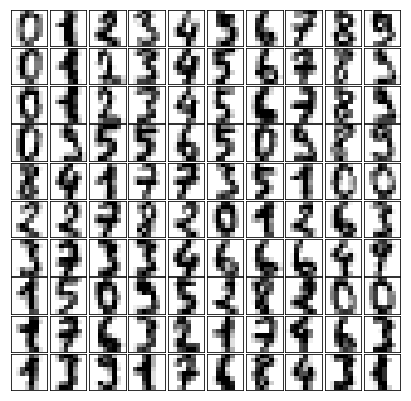

In [24]:
from sklearn import mixture
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape
print("digits data shape: ", digits.data.shape)

def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(7, 7),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

plot_digits(digits.data)

To reduce the dimension we use PCA asking it to preserve 99% of the variance in the projected data.

In [25]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

$\blacktriangleright$ CQ4. Fit a GMM model on the transformed data using the function mixture.GaussianMixture from sklearn.

In [26]:
gmm = mixture.GaussianMixture(n_components=10, covariance_type='full',random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


$\blacktriangleright$ CQ5. Generate new samples from the fitted GMM and plot the resulting image

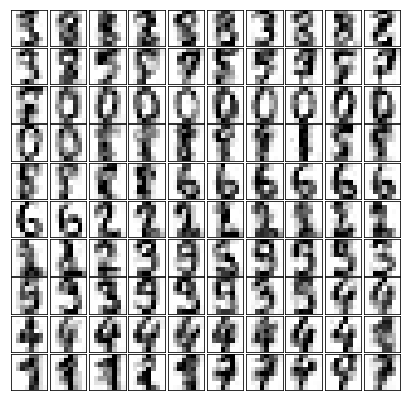

In [27]:
data_new, _ = gmm.sample(100)
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)